In [1]:
### uncomment to display figures
# %matplotlib inline

# Demonstrates benchmarking functionality - QObs

In [2]:
from awrams.benchmarking.benchmark import Benchmark
from awrams.benchmarking.utils import read_id_csv
from awrams.utils import datetools as dt

## Set up comparison
comparing against observed streamflow

In [3]:
data_path = '../../test_data/benchmarking/'
obs_csv = data_path+'/runoff/q_obs.csv'
catchment_csv = data_path+'/catchment_ids.csv'
id_list=read_id_csv(catchment_csv)
q = Benchmark("QObs", "runoff")
q.period = dt.dates("1981", "30/12/2011")
q.load(obs_csv, id_list=id_list)

In [4]:
q.sites

['109001',
 '105001',
 '112102',
 '116008',
 '111101',
 '4508',
 '113004',
 '108003',
 '107002',
 '5115']

## Add models to the comparison
read data from pre-processed csv

In [5]:
csv_data = data_path+'/runoff/awral_qtot_avg.csv'
q.add_model("AWRAMSI_v4_0_AWRAL", data_csv=csv_data)

### Show list of loaded or selected models
list of loaded models is available with <tab> activated dropdown by typing "et.models."<br>
can "select" or "unselect" models for displaying

In [6]:
q.benchmark.selection

['AWRAMSI_v4_0_AWRAL']

In [7]:
q.benchmark.selection.AWRAMSI_v4_0_AWRAL.unselect()
q.benchmark.selection.AWRAMSI_v4_0_AWRAL.select()

## Regression plotting
specify frequency by "freq=d" for daily, "freq=m" for monthly, "freq=y" for yearly<br>
can customise titles, labels, scaling etc using standard matplotlib keyword arguments


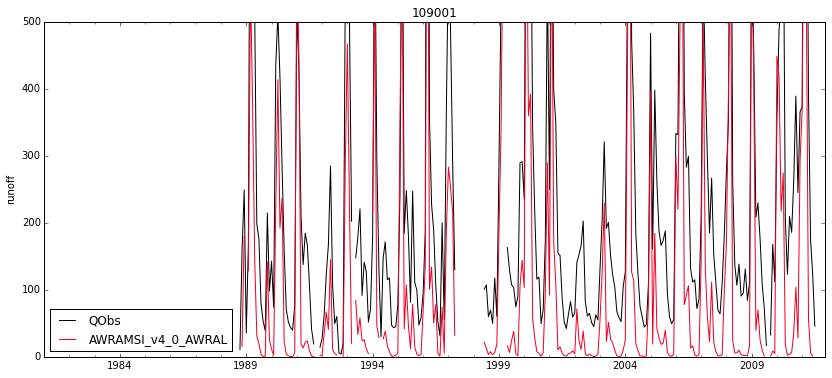

In [8]:
p = q.benchmark.plot_timeseries('109001',freq='m',ylim=[0,500])

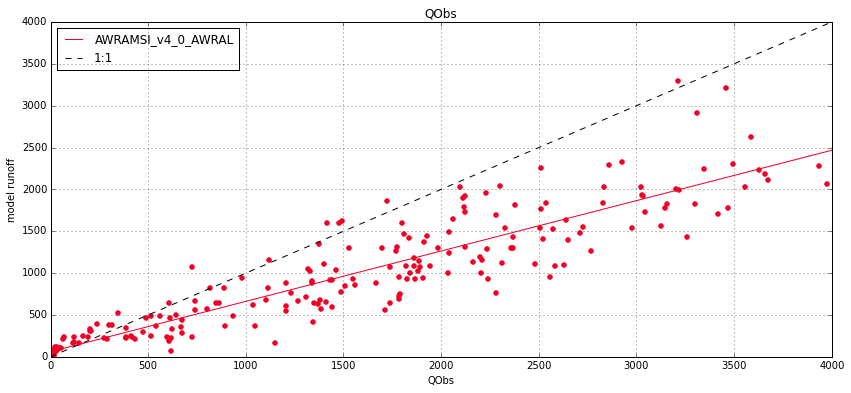

In [9]:
p = q.benchmark.plot_regression(title="QObs", freq='y', xlim=[0,4000],ylim=[0,4000])

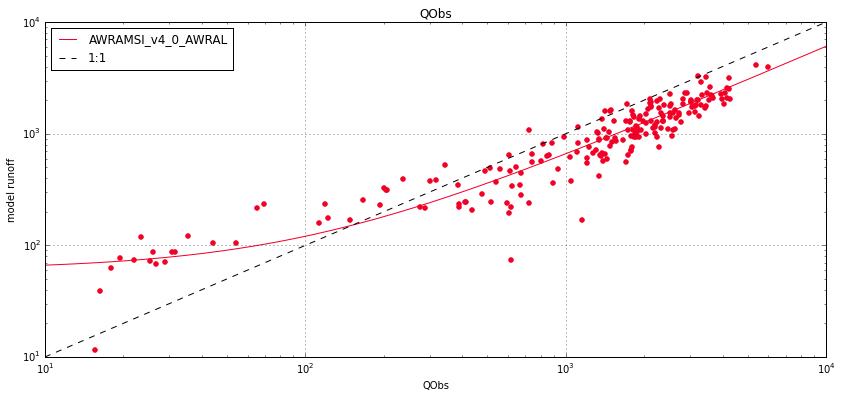

In [10]:
p = q.benchmark.plot_regression(title="QObs", freq='y', yscale='log', xscale='log', ylim=[10,10000], xlim=[10,10000])

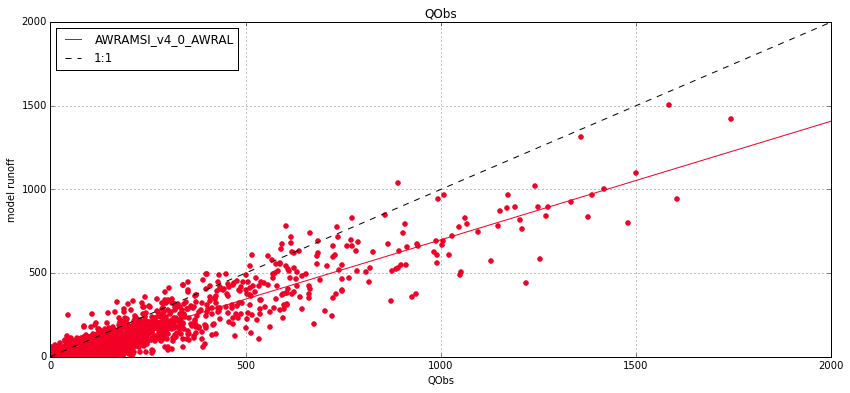

In [11]:
p = q.benchmark.plot_regression(title="QObs", freq='m', xlim=[0,2000],ylim=[0,2000])

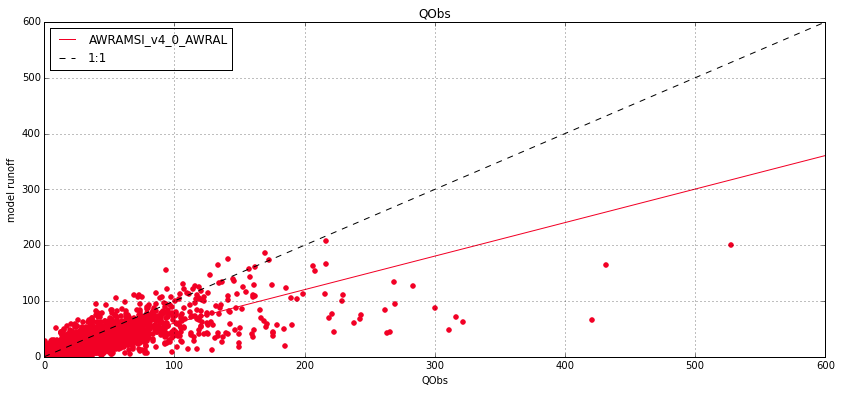

In [12]:
p = q.benchmark.plot_regression(title="QObs", freq='d', xlim=[0,600],ylim=[0,600])

## Statistics plotting
specify statistic type and frequency

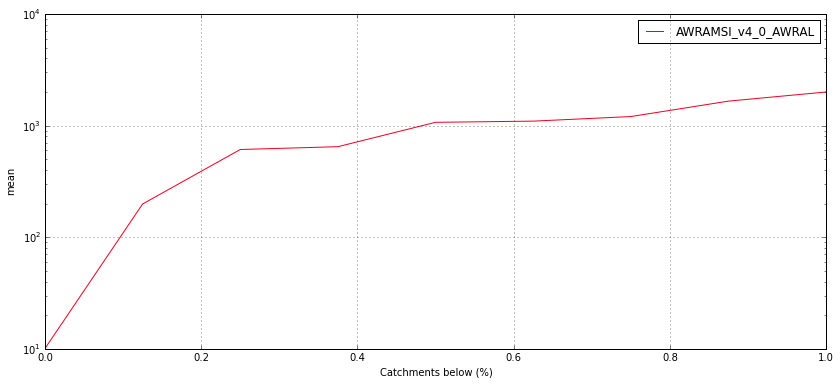

In [13]:
p = q.benchmark.plot_cdf('mean', freq='y', yscale='log')

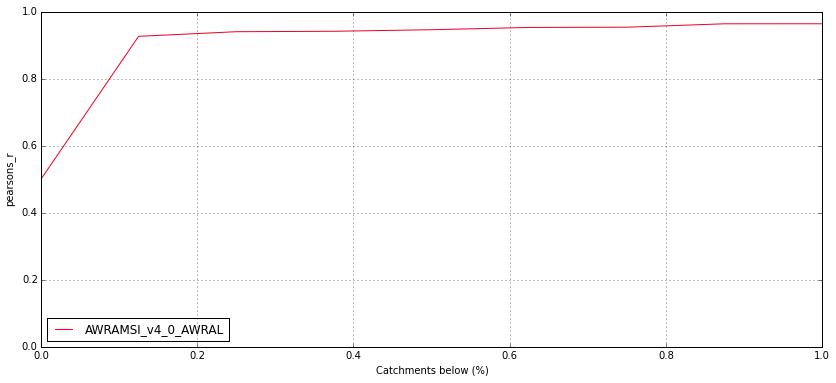

In [14]:
p = q.benchmark.plot_cdf('pearsons_r', freq='y', ylim=[0,1])

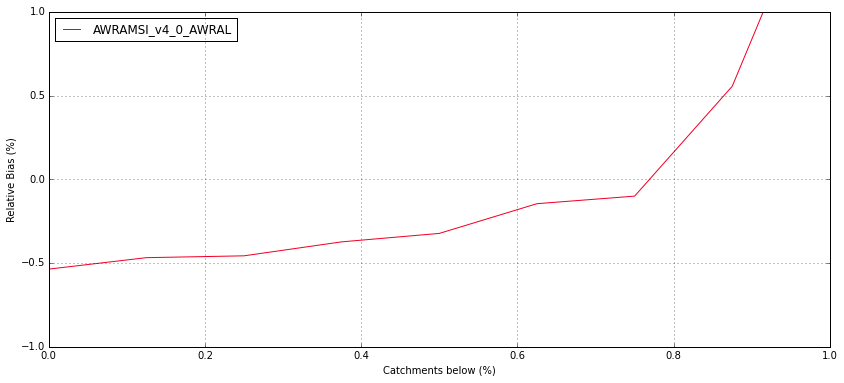

In [15]:
p = q.benchmark.plot_cdf('bias_relative',freq='y', ylabel='Relative Bias (%)', ylim=[-1,1])

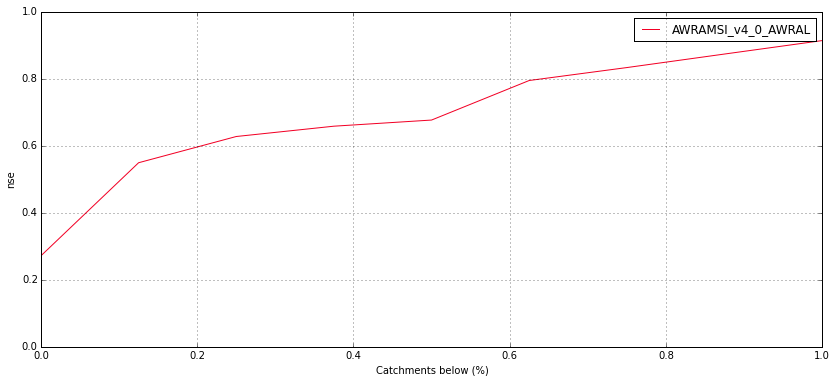

In [16]:
p = q.benchmark.plot_cdf('nse',freq='m', ylim=[0,1])

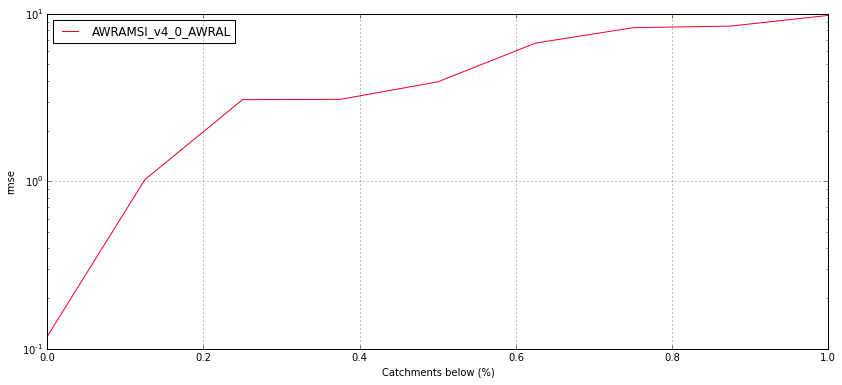

In [17]:
p = q.benchmark.plot_cdf('rmse',freq='d', yscale='log')

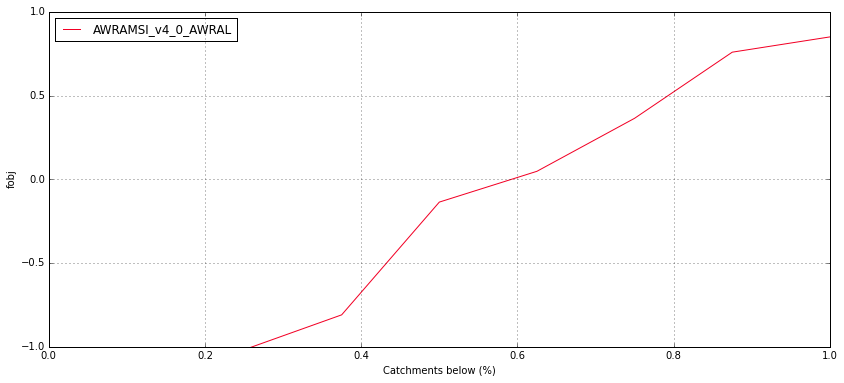

In [18]:
p = q.benchmark.plot_cdf('fobj',freq='d', ylim=[-1,1])

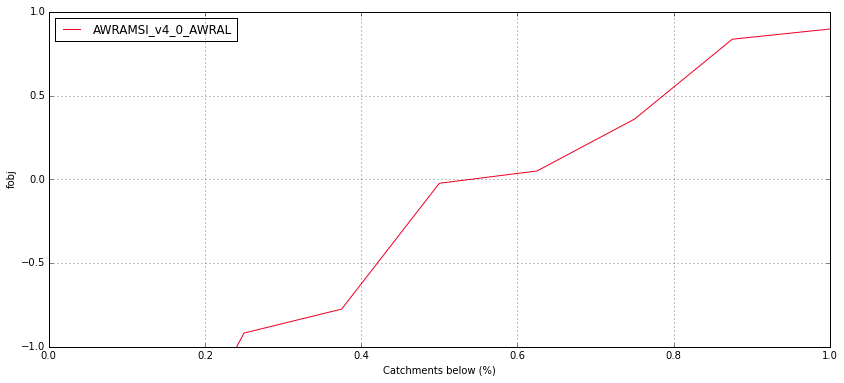

In [19]:
p = q.benchmark.plot_cdf('fobj',freq='m', ylim=[-1,1])

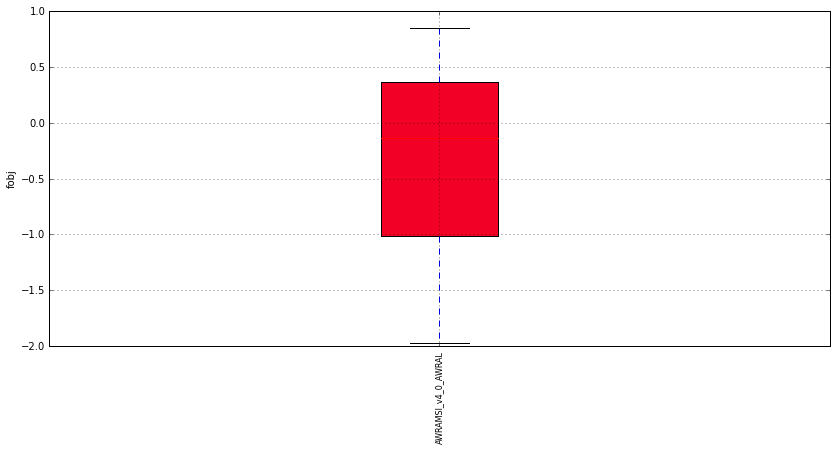

In [20]:
p = q.benchmark.plot_box('fobj', freq='d', ylim=[-2,1])

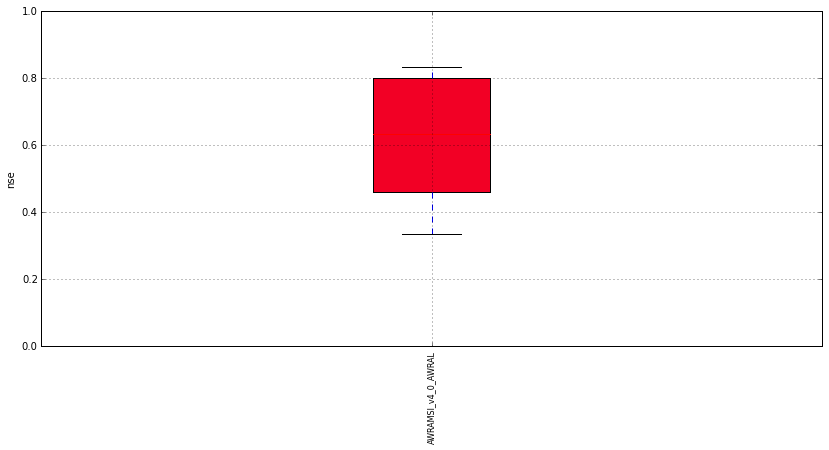

In [21]:
p = q.benchmark.plot_box('nse', freq='d', ylim=[0,1])

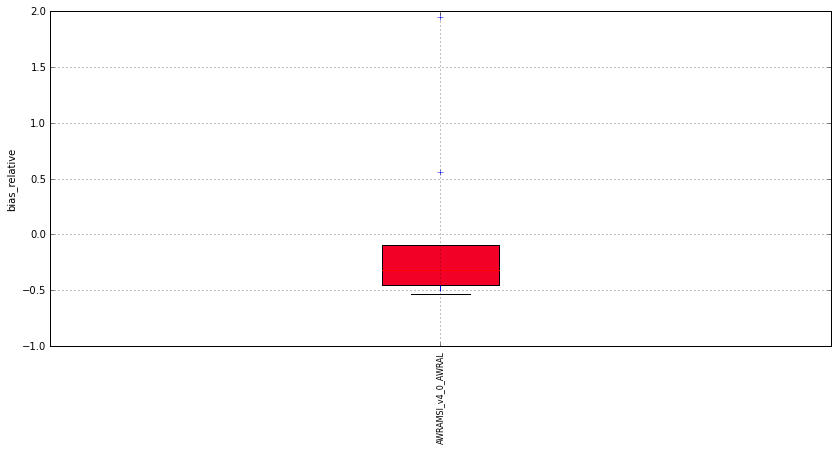

In [22]:
p = q.benchmark.plot_box('bias_relative', freq='m')

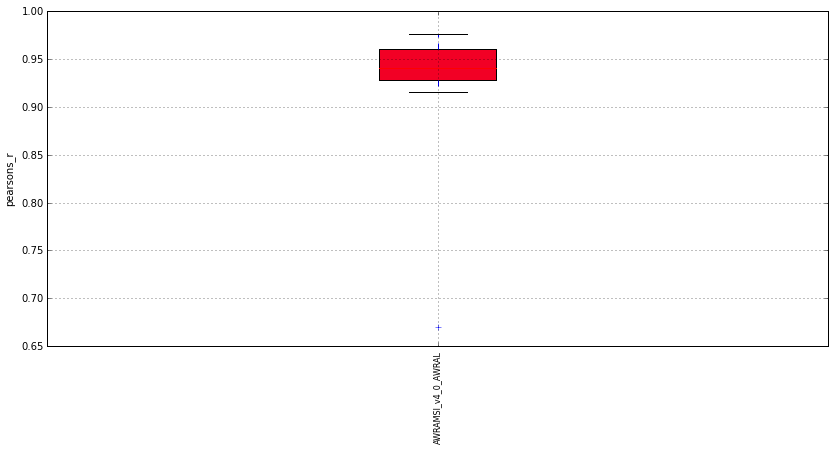

In [23]:
p = q.benchmark.plot_box('pearsons_r', freq='m')

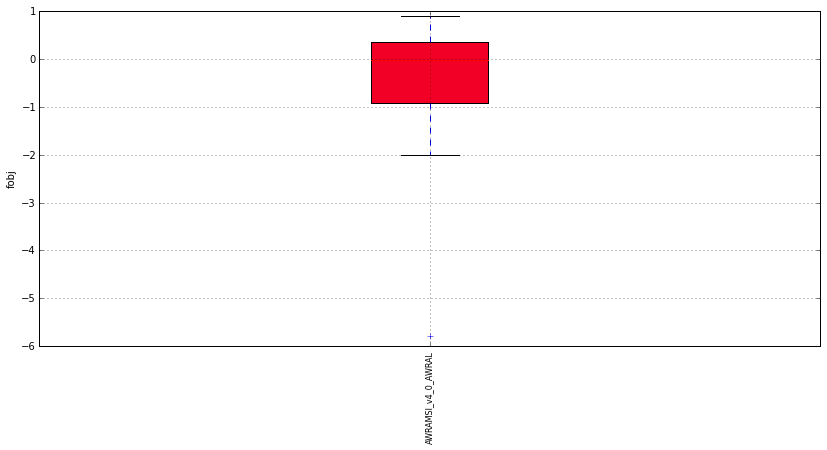

In [24]:
p = q.benchmark.plot_box('fobj', freq='m')

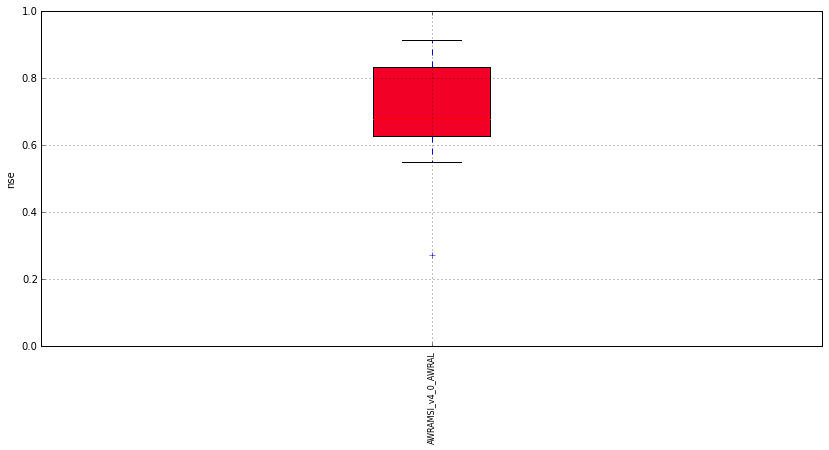

In [25]:
p = q.benchmark.plot_box('nse', freq='m', ylim=[0,1])

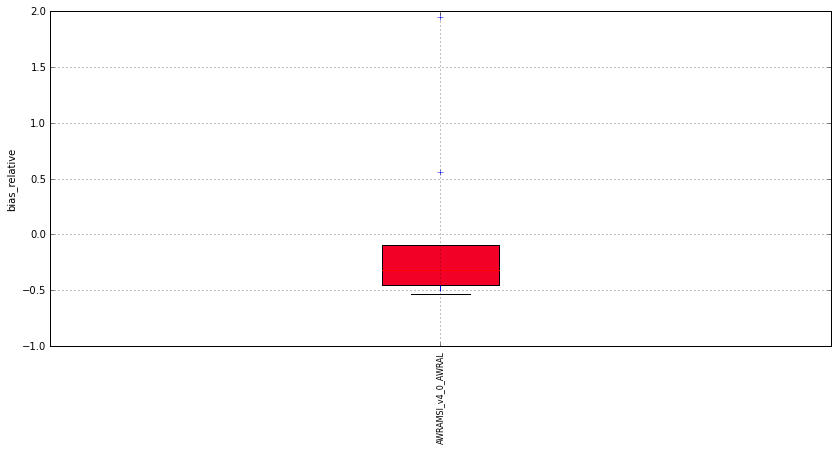

In [26]:
p = q.benchmark.plot_box('bias_relative', freq='m')

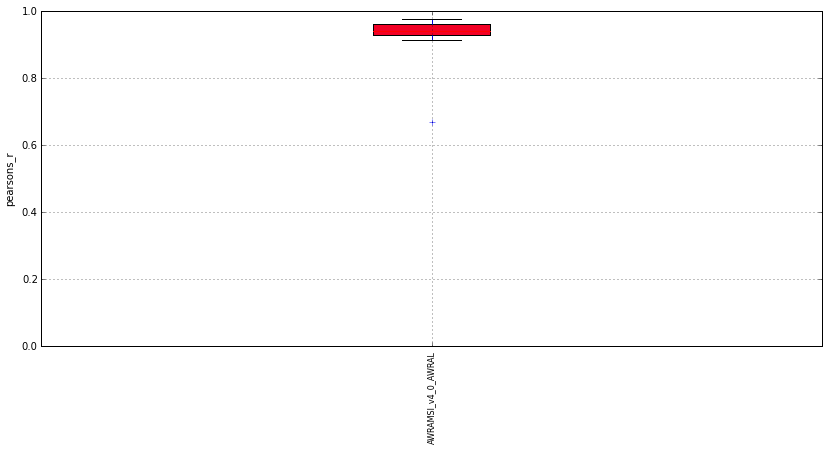

In [27]:
p = q.benchmark.plot_box('pearsons_r', freq='m', ylim=[0,1])

## View some statistics
Summary percentiles can be printed out by specifying a statistic to the 'stat_percentiles' function<br>
The timeframe defaults to monthly, but can be specified

In [28]:
q.benchmark.stat_percentiles('grand_f', freq='daily')

,grand_f
AWRAMSI_v4_0_AWRAL,0.015785


In [29]:
q.benchmark.stat_percentiles('grand_f', freq='monthly')

,grand_f
AWRAMSI_v4_0_AWRAL,0.079414


In [30]:
q.benchmark.stat_percentiles('nse')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v4_0_AWRAL,0.271805,0.382997,0.628121,0.677263,0.834034,0.898544,0.914612


In [31]:
q.benchmark.stat_percentiles('bias_relative')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v4_0_AWRAL,-0.534929,-0.507981,-0.45654,-0.322629,-0.096231,1.389183,1.944231


In [32]:
q.benchmark.stat_percentiles('pearsons_r',freq='d')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v4_0_AWRAL,0.605472,0.676093,0.82781,0.857553,0.908226,0.934009,0.934931


In [33]:
q.benchmark.data_percentiles(freq='d')

,0%,5%,25%,50%,75%,95%,100%
QObs,0.007468,0.033215,0.817031,3.959605,5.534223,8.695649,9.399966
AWRAMSI_v4_0_AWRAL,0.027104,0.253661,1.790567,3.053136,3.642913,5.440798,5.887065


In [34]:
q.benchmark.data_percentiles(freq='m')

,0%,5%,25%,50%,75%,95%,100%
QObs,0.223122,1.006759,24.369122,118.908425,167.596434,255.380894,277.203081
AWRAMSI_v4_0_AWRAL,0.839098,7.674550,54.521343,92.887510,110.854524,165.543277,179.176569


In [35]:
q.benchmark.data_percentiles(freq='y')

,0%,5%,25%,50%,75%,95%,100%
QObs,2.45434,11.958391,264.210174,1394.824112,1967.992576,2840.950169,3169.355227
AWRAMSI_v4_0_AWRAL,10.05198,85.375847,610.631375,1069.948122,1205.007902,1863.253305,2000.805022


In [36]:
q.benchmark.stat()

,AWRAMSI_v4_0_AWRAL,QObs
109001,110.854524,238.360273
105001,17.927729,11.517143
112102,145.093339,160.542532
111101,179.176569,285.815689
4508,0.839098,0.284997
116008,54.521343,102.399044
108003,92.887510,170.918889
107002,55.337463,63.690433
113004,94.130333,138.964279
all,92.298593,144.322406
